# Asperand Pixel Counting
Juan Manuel González Kapnik - just-juanma

2024/02/21

## Description
You can paint an asperand by pixels in three steps:
1. First you paint the inner square, with a side of `k`
2. Then you need to paint one pixel, that's laying diagonally relative to the inner square that you just painted (_the bottom-right corner of the inner square is touching the top-left corner of the pixel_). Let's call it the "bridge".
3. Finally, you will need to paint the outer shape, connected diagonally to the "bridge" (_see the picture for more information_).

Here are some examples of this:

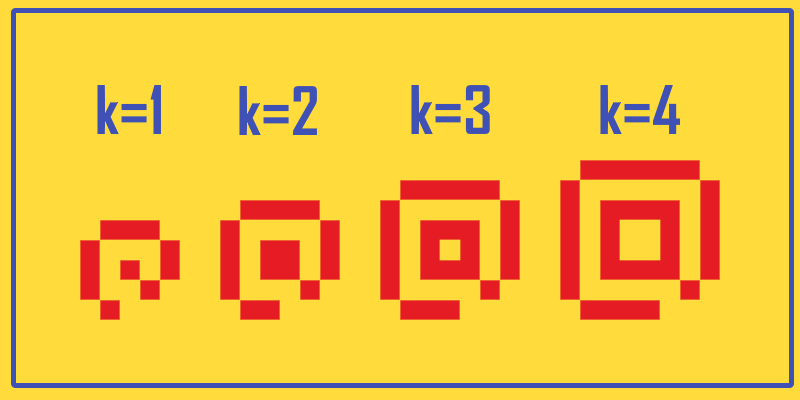

In [5]:
from IPython.display import Image
Image('1.png')

Your task is to find the number of pixels that need to be painted, for different k:
```python
k = 1 => 11
k = 2 => 18
k = 3 => 26
k = 4 => 34

# Limitations are 1 ≤ k ≤ 1e9
```

## Explanation
First I converted the image to a more readable format, so that I can visualize the number of pixels per side easily:

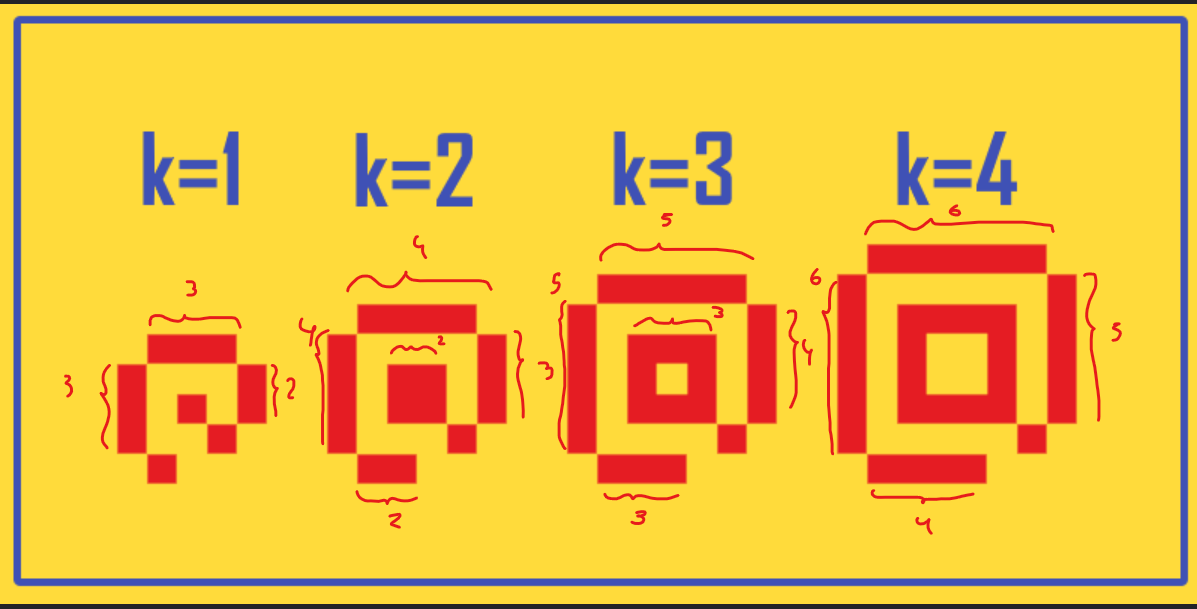

In [6]:
Image('2.png')

At first glance, it is easy to see that the size of the inner square is given by:
$$k^2$$
However, since $k=3$ I have to subtract, to that amount of pixels, what would be the "filling" of that internal square. If we look at $k=4$, we observe that the filling is the same inner square as for $k=2$. Therefore, we could define that filling as:
$$(k-2)^2$$
However, let us note that for $k=1$ this does not work. Therefore, this count should be performed only when k > 1.
Therefore, we could define the number of pixels of the inner square as:
$$\begin{equation}square
\left\lbrace
\begin{array}{ll}
\textup k^2-(k-2)^2 \space \space \space \to (k>1)\\
\textup k^2  \space \space \space \to (k=1)
\end{array}
\right.
\end{equation}$$
By definition, we know that bridge will always have 1 as its value.
To get the outer shape calculation, I simply counted how many pixels there were for $k=3$, and tried to generalize it to any $k$:
$$outer=17 \to (k = 3) \to 4k+5$$ 
Then, asperand would be left with the following formula:
$$ square+bridge+outer \to k^2-(k-2)^2 + 1 + 4k+5$$
And in the case of $k=1$:
$$ square+bridge+outer \to k^2 + 1 + 4k+5$$

## Solution

In [7]:
def count_pixels(k):
    sq = k ** 2
    if k > 1:
        sq = sq - (k - 2) ** 2
    br = 1
    ou_sh = 4 * k + 5
    return sq + br + ou_sh

## Sample Test
Paste the tests offered by the exercise, those that are not hidden

In [8]:
import codewars_test as test

@test.it("Basic tests")
def basic_tests():
    test.assert_equals(count_pixels(1), 11)
    test.assert_equals(count_pixels(2), 18)
    test.assert_equals(count_pixels(3), 26)
    test.assert_equals(count_pixels(4), 34)


<IT::>Basic tests

<PASSED::>Test Passed

<PASSED::>Test Passed

<PASSED::>Test Passed

<PASSED::>Test Passed

<COMPLETEDIN::>3.70
